In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
from statsmodels.stats.proportion import proportion_confint

In [2]:
df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124.0,ad,False,130.0,Monday,20.0
1,1,1119715.0,ad,False,93.0,Tuesday,22.0
2,2,1144181.0,ad,False,21.0,Tuesday,18.0
3,3,1435133.0,ad,False,355.0,Tuesday,10.0
4,4,1015700.0,ad,False,276.0,Friday,14.0


In [3]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113548 entries, 0 to 113547
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     113548 non-null  int64  
 1   user id        113547 non-null  float64
 2   test group     113547 non-null  object 
 3   converted      113547 non-null  object 
 4   total ads      113547 non-null  float64
 5   most ads day   113547 non-null  object 
 6   most ads hour  113547 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 6.1+ MB


Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [12]:
control = df[df["test group"] == "psa"]
treatment = df[df["test group"] == "ad"]

In [6]:
alpha = 0.05

In [7]:
control_rate = control["converted"].mean()
treatment_rate = treatment["converted"].mean()

control_rate, treatment_rate

(np.float64(0.05281136780689785), nan)

In [8]:
control_conv = control["converted"].sum()
control_total = control.shape[0]

treat_conv = treatment["converted"].sum()
treat_total = treatment.shape[0]

In [17]:
contingency_table = [
    [control_conv, control_total - control_conv],
    [treat_conv, treat_total - treat_conv]
]

contingency_table

[[5612, 100653], [0, 0]]

In [19]:
successes = np.array([control_conv, treat_conv])
samples = np.array([control_total, treat_total])

In [20]:
z_stat, p_value = proportions_ztest(successes, samples)
z_stat, p_value

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/proportion.py:1004: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/proportion.py:1020: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)


(np.float64(nan), np.float64(nan))

In [21]:
alpha = 0.05

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Fail to Reject Null Hypothesis


In [26]:
ci_control = proportion_confint(control_conv, control_total, alpha=0.05, method='normal')
ci_treat = proportion_confint(treat_conv, treat_total, alpha=0.05, method='normal')

ci_control, ci_treat

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/proportion.py:190: RuntimeWarning: invalid value encountered in divide
  q_ = count_a / nobs_a


((0.05146663836290745, 0.054156097250888255), (nan, nan))

In [27]:
diff = treatment_rate - control_rate

ci_low = ci_treat[0] - ci_control[1]
ci_high = ci_treat[1] - ci_control[0]

ci_low, ci_high

(nan, nan)

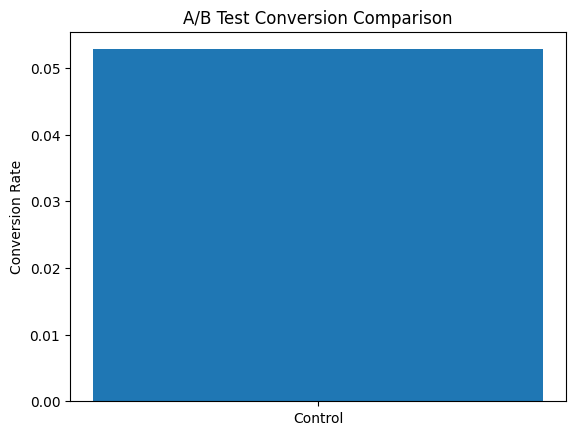

In [28]:
plt.bar(["Control", "Treatment"], [control_rate, treatment_rate])
plt.ylabel("Conversion Rate")
plt.title("A/B Test Conversion Comparison")
plt.show()

In [29]:
summary = pd.DataFrame({
    "Group": ["Control", "Treatment"],
    "Conversion_Rate": [control_rate, treatment_rate]
})

summary.to_csv("ab_test_summary.csv", index=False)
summary

,Group,Conversion_Rate
0,Control,0.052811
1,Treatment,NaN
